In [1]:
#In this tutorial, I will talk about Ridge and Lasso
#they are techniques used to fix overfitting problem for LinearRegression

In [2]:
#How they work?
#Ridge and Lasso work in the same way by trying to minimize the magnitudes of coefficients


In [3]:
#Let's see how coefficient magnitudes affect the model complexity

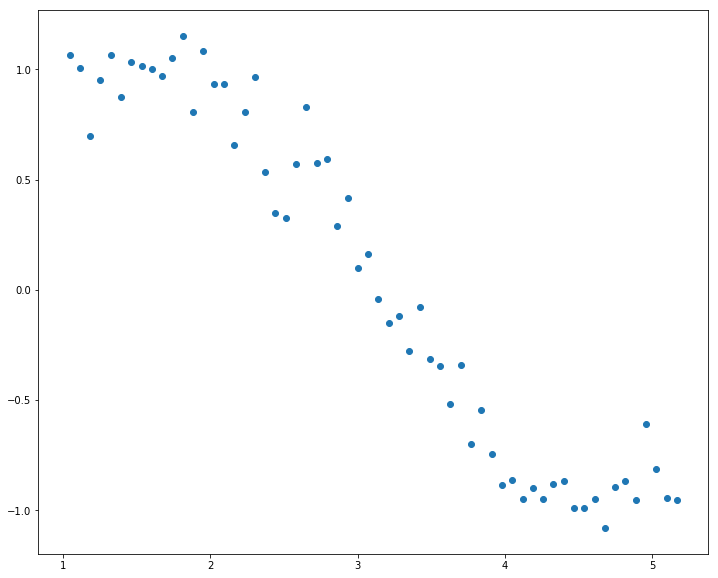

In [17]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

#generate X, Y
x = np.array([i*np.pi / 180 for i in range(60, 300, 4)])
np.random.seed(10)
y = np.sin(x) + np.random.normal(0, 0.15, len(x))

data = pd.DataFrame(np.c_[x, y], columns=['x', 'y'])
plt.scatter(data["x"], data['y'])

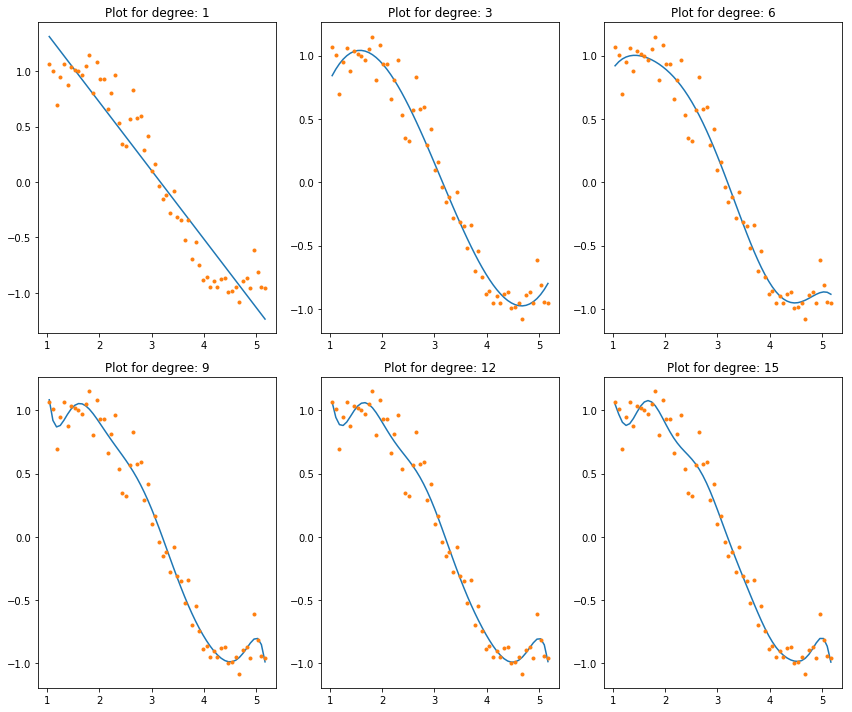

In [29]:
#next, I train 15 polynomial regressions with the degree from 1 to 15 and look at their coefficients
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
for i in range(2, 16):
    column = 'x_%d'%i
    data[column] = data['x'] ** i

def poly_regression(degree, models_to_plot):
    features = ['x']
    if(degree >= 2):
        features.extend(['x_%d'%i for i in range(2, degree+1)])
    
    lin_reg = LinearRegression()
    lin_reg.fit(data[features], data['y'])
    y_pred = lin_reg.predict(data[features])
    
    
    if degree in models_to_plot:
        plt.subplot(models_to_plot[degree])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for degree: %d'%degree)
    
    rss = sum((data['y'] - y_pred)**2)
    result = [rss]
    result.extend([lin_reg.intercept_])
    result.extend(lin_reg.coef_)
    return result

#prepare dataframe to hold results of each model
col = ['rss', 'intercept'] + ['x_%d'%i for i in range(1, 16)]
indices = ['model_degree%d'%i for i in range(1, 16)]
df = pd.DataFrame(index=indices, columns=col)

models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

for i in range(1, 16):
    result = poly_regression(i, models_to_plot)
    df.iloc[i-1,0:i+2] = result

In [30]:
#look at plotted model, as degree number increase the model complexity also increase

In [31]:
df

,rss,intercept,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
model_degree1,3.28032,1.96286,-0.619575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_degree2,3.27668,1.91406,-0.582551,-0.00595874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_degree3,1.10335,-1.0807,3.03157,-1.28553,0.137292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_degree4,1.07858,-0.265704,1.68692,-0.531752,-0.0356785,0.0139192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_degree5,1.01857,2.9915,-5.11776,4.72461,-1.92856,0.334735,-0.0206533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_degree6,0.990074,-2.80155,9.51665,-9.7132,5.22609,-1.55489,0.233099,-0.0136132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_degree7,0.928265,19.3021,-55.9523,68.9562,-44.6319,16.5148,-3.52814,0.40451,-0.0192269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_degree8,0.91761,43.1676,-137.013,183.825,-133.499,57.6767,-15.2527,2.41654,-0.210019,0.00767667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_degree9,0.874941,167.835,-614.513,963.403,-846.437,460.905,-161.849,36.7577,-5.2208,0.421902,-0.0148148,NaN,NaN,NaN,NaN,NaN,NaN
model_degree10,0.874578,137.717,-486.125,726.133,-595.881,293.256,-87.4563,14.5462,-0.806073,-0.138205,0.0262231,-0.00132096,NaN,NaN,NaN,NaN,NaN


In [ ]:
#see? as model complexity increase the magnitudes of each coefficient are also increase
#So... If you want to reduce model complexity you need you minimize the model's coeffients 